In [1]:
# First Import the Relevant Packages
import pandas as pd   
import matplotlib.pyplot as plt

We will be using the Pokemon Dataset, containing the attributes of 721 Pokemon.

This dataset is both fun and useful.

The data can take a number of different formats (Boolean, Integer, String, etc).

It is in some ways realistic in that it contains NaNs (where Pokemon have only one type).

The data can be grouped and analysed in a number of different ways, e.g. by combat stat, by type, etc.

There are also relations within the data not shown explicitly e.g. Pokemon of the same evolutionary line.

## Basics 

In [2]:
#Begin by loading up the dataset
path = 'Pokemon.csv' # path can be more complex than this, but in this case our data file is in the same folder
df = pd.read_csv(path) 

In [3]:
df.head(n = 10) # the head function shows a sneakpeak of the top(n) rows. 


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### The head function is a useful way to get a good first glance at your data. An alternative is using info:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
# We can find the column heads using .columns:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
dir(df); #This shows all the attributes and methods associated with any Python Object. 
# You will see 'columns' is just one of many.
# Use this at any time to explore more of what can be done with your dataframe


### There is a property of this dataframe known as its index. The index of the dataframe is the label by which each row is called. By default, it is the row number, but this can be assigned.

In [7]:
df.index # This function shows the index

RangeIndex(start=0, stop=800, step=1)

In [8]:
df.head(10) # The index also shows as the left most column 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### Often the row number is a very arbitrary way to index the data and instead, one of the columns would make more sense. We now set the index instead to the "Name" attribute

In [9]:
df = df.set_index('Name') # Notice the leftmore column is now "Name"
df.head(10)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


### Practically, it is often awkward to have headings in mixed case, so we can change them to upper case and clean the data.

In [10]:
# First the columns:
df.columns = df.columns.str.upper() # Changing the column headings to upper case only
df.columns = df.columns.str.replace(' ', '') #We can remove the space gaps too
df.head(10)

,#,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


### Note that the "Name" column, as index, is now treated separately. It was not changed to upper case as it is not a column heading anymore.

In [11]:
df.index # gives the indexes themselves - in this case the names
df.index.name # gives the *name* of the index itself

'Name'

In [12]:
df.index.name = df.index.name.upper() # This changes the index name to upper case

In [13]:
df.index = df.index.str.upper() # We can make the names upper case too.
df.head(10)

,#,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
BULBASAUR,1,Grass,Poison,318,45,49,49,65,65,45,1,False
IVYSAUR,2,Grass,Poison,405,60,62,63,80,80,60,1,False
VENUSAUR,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VENUSAURMEGA VENUSAUR,3,Grass,Poison,625,80,100,123,122,120,80,1,False
CHARMANDER,4,Fire,NaN,309,39,52,43,60,50,65,1,False
CHARMELEON,5,Fire,NaN,405,58,64,58,80,65,80,1,False
CHARIZARD,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CHARIZARDMEGA CHARIZARD X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CHARIZARDMEGA CHARIZARD Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [14]:
# This looks a little messy, so we'll change it back
df.index = df.index.str.capitalize()
df.head(10)

,#,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Venusaurmega venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Charizardmega charizard x,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Charizardmega charizard y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [15]:
# The names of the mega pokemon need fixing, lets start by removing the bit before the "mega" and THEN capitalizing
df.index = df.index.str.replace(".*(?=mega)", "").str.title()
df.head(10)

,#,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [16]:
# Now lets drop that unsightly # column
df = df.drop(['#'], axis =1)
df.head(10)

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [38]:
# We can fill all the type 2 NaNs with 0
df['TYPE2'].fillna('0', inplace = True)
df[df['TYPE2'] == '0'].head(10) # You can search rows conditionally

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Charmander,Fire,0,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,0,405,58,64,58,80,65,80,1,False
Squirtle,Water,0,314,44,48,65,50,64,43,1,False
Wartortle,Water,0,405,59,63,80,65,80,58,1,False
Blastoise,Water,0,530,79,83,100,85,105,78,1,False
Mega Blastoise,Water,0,630,79,103,120,135,115,78,1,False
Caterpie,Bug,0,195,45,30,35,20,20,45,1,False
Metapod,Bug,0,205,50,20,55,25,25,30,1,False
Rattata,Normal,0,253,30,56,35,25,35,72,1,False


In [48]:
#0 doesnt quite fit. Lets change TYPE2 NaNs to the values of their corresponding type1s:
df['TYPE2'].replace('0',df['TYPE1'], inplace = True)
df.head(10)

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [49]:
df.loc['Bulbasaur'] # loc allows us to search for a row using the index

TYPE1          Grass
TYPE2         Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP.ATK            65
SP.DEF            65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object

In [50]:
df.iloc[0] # we can still search via integer index 

TYPE1          Grass
TYPE2         Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP.ATK            65
SP.DEF            65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object

### What if we want an element or elements from this row?

In [51]:
df.loc['Bulbasaur', 'TYPE1'] # again we use loc

'Grass'

In [53]:
print(df.loc['Bulbasaur', ['TYPE1', 'TYPE2']]) # and again for multiple elements 
print('Weedles Attack Value is', df.at['Weedle', 'ATTACK']) #at function works ONLY for a single value in the entire dataframe

TYPE1     Grass
TYPE2    Poison
Name: Bulbasaur, dtype: object
Weedles Attack Value is 35


In [72]:
# Checking an index is present:

guess = 'Weedle'
print(guess in df.index)

bad_guess = 'Mega Weedle'
print(bad_guess in df.index)

#Checking if a value is or isnt

print(df.at['Weedle', 'ATTACK']==50)

True
False
False


In [65]:
# Find all TYPE1 Fighting types:

df[df['TYPE1']=='Fighting'] 

# wait, this is just type 1, try both types now

df[((df['TYPE1']=='Fighting') | (df['TYPE2']=='Fighting'))];# use conditionals. 

## NB NEED TO ENCLOSE THEM IN BRACKETS IN ORDER TO APPLY LOGICAL OPERATORS!

df.head(10)

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [119]:
# Sorting and finding data values
print(df['HP'].max()) # Finds the maximum HP
print(df['HP'].idxmax()) # Finds the index (pokemon) with the maximum HP

print(df[df['TYPE1']=='Bug']['DEFENSE'].idxmax()) # finds the bug pokemon with the highest defense value

255
Blissey
Shuckle


In [94]:
# Counts the size of groups according to TYPE1

print(df.groupby(['TYPE1']).size())
print(df.groupby(['TYPE1', 'TYPE2']).size())

TYPE1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64
TYPE1     TYPE2   
Bug       Bug         17
          Electric     2
          Fighting     2
          Fire         2
          Flying      14
          Ghost        1
          Grass        6
          Ground       2
          Poison      12
          Rock         3
          Steel        7
          Water        1
Dark      Dark        10
          Dragon       3
          Fighting     2
          Fire         3
          Flying       5
          Ghost        2
          Ice          2
          Psychic      2
          Steel        2
Dragon    Dragon      11
          Electric     1
          Fairy        1
          Fire         1
          Flying       6
          Ground       5

In [96]:
#Finally, we can get a quick numerical analysis of all the numerical attributes:
df.describe()

,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Visualising and Analysing

### Graph visualisation is done by matplotlib with data directly references from the dataframe

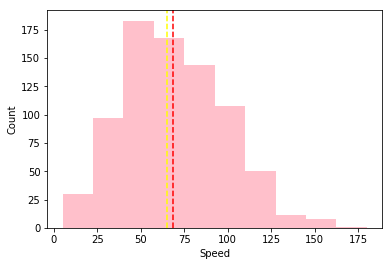

In [106]:
# Creating a histogram of SPEED values

plt.hist(df["SPEED"], color = 'pink') #hist() is used to plot a histogram
plt.xlabel('Speed') #set the xlabel name
plt.ylabel('Count') #set the ylabel name
plt.plot()
plt.axvline(df['SPEED'].mean(),linestyle='dashed',color='red') #draw a vertical line showing the average SPEED value
plt.axvline(df['SPEED'].median(),linestyle='dashed',color='yellow') #draw a vertical line showing the median SPEED value
plt.show()

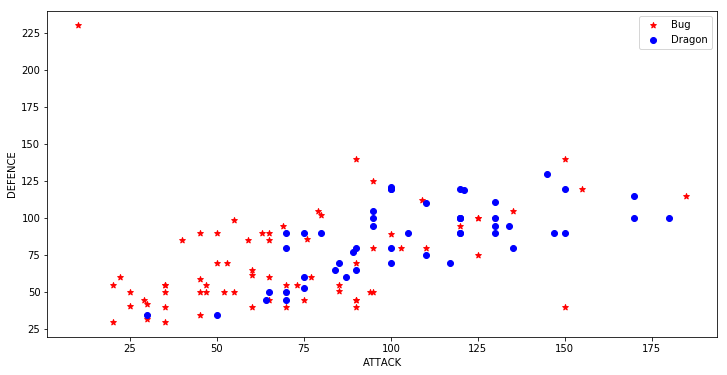

In [120]:
# Scatter Comparing Dragon vs Bug pokemon attacks vs defences

bug=df[(df['TYPE1']=='Bug') | (df['TYPE2']=='Bug')] # bug contains all bug pokemons
dragon=df[(df['TYPE1']=='Dragon') | ((df['TYPE2'])=="Dragon")]  # dragon contains all dragon pokemon

plt.scatter(bug.ATTACK,bug.DEFENSE,color='R',label='Bug',marker="*") 
plt.scatter(dragon.ATTACK,dragon.DEFENSE,color='B',label="Dragon")
plt.xlabel("ATTACK")
plt.ylabel("DEFENCE")
plt.legend()
plt.plot()
fig=plt.gcf()  #get figure
fig.set_size_inches(12,6) #set figure size
plt.show()

In [125]:
# We can compare the stats of bug and dragon types using describe:
print('Bugs Summary\n' , bug.describe())
print('Dragons Summary\n', dragon.describe())

Bugs Summary
             TOTAL         HP      ATTACK     DEFENSE      SP.ATK      SP.DEF  \
count   72.000000  72.000000   72.000000   72.000000   72.000000   72.000000   
mean   379.527778  56.736111   71.763889   71.111111   53.569444   64.666667   
std    116.355692  16.308637   36.998094   33.250460   26.399331   31.562145   
min    194.000000   1.000000   10.000000   30.000000   10.000000   20.000000   
25%    281.000000  45.000000   45.000000   50.000000   33.750000   45.000000   
50%    392.500000  60.000000   65.000000   60.000000   50.000000   60.000000   
75%    477.250000  70.000000   91.000000   90.000000   66.000000   80.000000   
max    600.000000  86.000000  185.000000  230.000000  135.000000  230.000000   

            SPEED  GENERATION  
count   72.000000   72.000000  
mean    61.680556    3.222222  
std     32.618938    1.567471  
min      5.000000    1.000000  
25%     36.000000    2.000000  
50%     60.000000    3.000000  
75%     85.000000    5.000000  
max    16

In [129]:
# Can also extract values without the full describe function: 
print('Mean Dragon Attack', dragon.ATTACK.mean())
print('Standard deviation of SP DEF stat', bug['SP.DEF'].std())

Mean Dragon Attack 105.76
Standard deviation of SP DEF stat 31.562145270632467


In [136]:
print('number of unique types is', df.TYPE1.nunique())

number of unique types is 18


In [176]:
# Sorting according to types

type_counts = df['TYPE1'].value_counts()
print(type_counts)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: TYPE1, dtype: int64


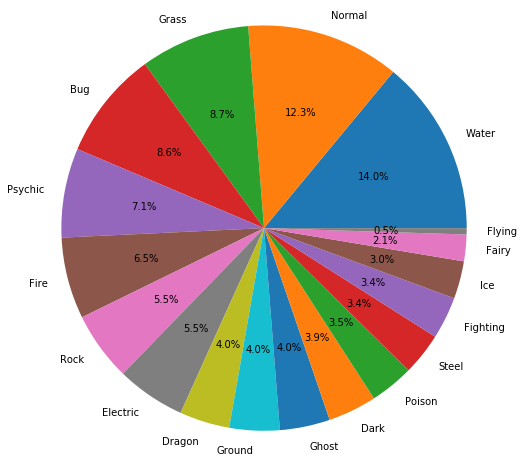

In [247]:
#Plotting pokemon type by number of pokemon in a pie chart

a = df.TYPE1.value_counts();

plt.pie(a, labels = a.index, autopct='%1.1f%%')
plt.axis('equal')
fig=plt.gcf()  #get figure
fig.set_size_inches(8,8) #set figure size
plt.show()



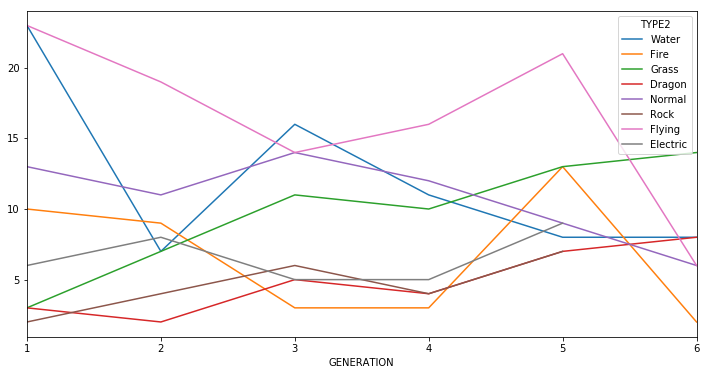

In [212]:
# Line Graphing Generation and Type 2 trends


a = df.groupby(['GENERATION', 'TYPE2']).count().reset_index();
b = a[['GENERATION', 'TYPE2','TOTAL']];
b = b.pivot('GENERATION', 'TYPE2', 'TOTAL');

b = b[['Water', 'Fire','Grass','Dragon','Normal','Rock','Flying','Electric']];
b.plot()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [249]:
import seaborn as sns
#import seaborn for additional visualisation tools

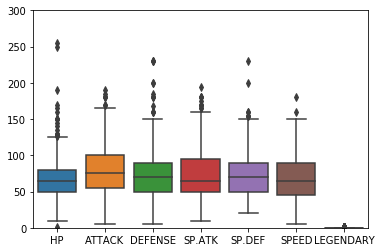

In [261]:
# COMPARING STATS OVERALL

df2 = df.drop(['GENERATION', 'TOTAL'],axis = 1)
sns.boxplot(data=df2)
plt.ylim(0,300)  #change the scale of y axix
plt.show()

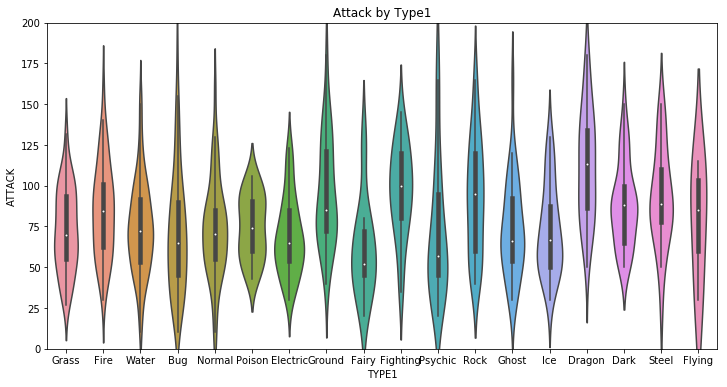

In [265]:
# Comparing STATS BY TYPE
# Violin plots are nice - they compare density too

plt.title('Attack by Type1')
sns.violinplot(x = "TYPE1", y = "ATTACK",data = df)
plt.ylim(0,200)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

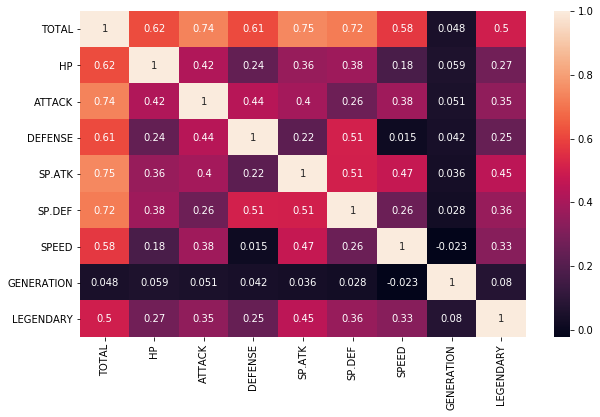

In [266]:
# Plotting Correlations is easy - use .corr()

plt.figure(figsize=(10,6)) #manage the size of the plot
sns.heatmap(df.corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()
